# Navigation

In this notebook, we learn to pick edible bananas :)

### 1. Start the Environment

We begin by importing some necessary packages and by declaring the banana environment.
Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain that is the banana brains.

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import time
   # Delays for 5 seconds. You can also use a float value.

#agent
#from dqn_agent import Agent 
#double dqn
from dqn_agent_d import Agent 



env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]



print(brain_name)
print(brain)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [2]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations
print('States look like:', state.shape)
state_size = len(state)
print('States have length:', state_size)


Number of agents: 1
Number of actions: 4
States look like: (1, 37)
States have length: 1


### 3. Define the agent

We define the agent which contains 37 states and 4 actions

In [3]:
agent = Agent(state_size=37, action_size=4, seed=0)

Episode 100	Average Score: -0.23
Episode 200	Average Score: 1.54
Episode 300	Average Score: 6.44
Episode 400	Average Score: 7.67
Episode 500	Average Score: 9.23
Episode 600	Average Score: 10.11
Episode 700	Average Score: 10.40
Episode 800	Average Score: 10.53
Episode 900	Average Score: 11.62
Episode 1000	Average Score: 12.65

Environment solved in 1059 episodes!	Average Score: 13.01


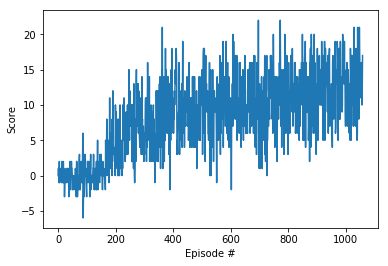

In [4]:
def dqn(n_episodes=2000, max_t=300, eps_start=0.003, eps_end=0.001, eps_decay=0.9):
    """Deep Q-Learning.   
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    max_time = 0
    for i_episode in range(1, n_episodes+1):
        #print(brain_name)
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]          # get the current state
        score = 0 #reset the state
        #time.sleep(2)
        for t in range(max_t):
            action = agent.act(state, eps) #dqn act
            action = action.astype(np.int32)
            env_info = env.step(action)[brain_name]        # send the action to the environment (banana)
            next_state = env_info.vector_observations[0]   # get the next state (banana)
            #print(env_info.rewards)
            reward = env_info.rewards[0]         
            # get the reward (banana)
            done = env_info.local_done[0]                  # see if episode has finished (banana)
            agent.step(state, action, reward, next_state, done) ## dqn agent step
            state = next_state
            score += reward
            #if i_episode == 100:
            #    time.sleep(2)
            if done:
                if t > max_time:
                    max_time = t
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window, dtype=np.float64)))
        if np.mean(scores_window, dtype=np.float64)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window, dtype=np.float64)))
            torch.save(agent.qnetwork_local.state_dict(), 'q_checkpoint.pth')
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_ddqn.pth')
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [5]:
env.close()